## Dataset
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

## Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.

Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. (Grayscale Images)

The training and test data sets have 785 columns.

The first column consists of the class labels (see above), and represents the article of clothing.

The rest of 784 columns (1-785) contain the pixel-values of the associated image.

-------
There are 10 different classes of images, as following:

0: T-shirt/top;

1: Trouser;

2: Pullover;

3: Dress;

4: Coat;

5: Sandal;

6: Shirt;

7: Sneaker;

8: Bag;

9: Ankle boot.

Image dimmensions are 28x28.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
# Loading the Dataset

In [3]:
df = tf.keras.datasets.fashion_mnist

In [4]:
(x_train,y_train),(x_test,y_test)= df.load_data()

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

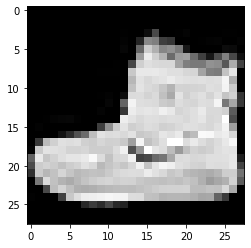

In [6]:
plt.imshow(x_train[0],cmap='gray')

In [7]:
y_train[0]

9

In [8]:
# 9 refering to Ankle Boot

In [9]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [10]:
class_names[y_train[0]]

'Ankle boot'

In [11]:
# We have grayscale images
# Current Shape
print(x_train.shape)
print(x_test.shape)
# len,h,w

(60000, 28, 28)
(10000, 28, 28)


In [12]:
# Reshaping the data
# Difference from ANN in Preprocessing
# Need to add 1 more Dimension only i.e Channels

In [13]:
# Convol Layer requires 3D array - h,w,no. of chaanel
# Grayscale thats why 1 channel, otherwise 3 for colored images
x_train_n = x_train.reshape((60000,28,28,1))
x_test_n = x_test.reshape((10000,28,28,1))

In [14]:
# Normalizing the Data
## As we will be using gradient descent, need to normalize the data
x_train = x_train_n/255.
x_test = x_test_n/255.

In [15]:
# Checking
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [16]:
# Creating the Model

In [17]:
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
# At the starting of our previous ANN model, we will just add some layers.

In [19]:
# Creating Object Model
model = tf.keras.models.Sequential()
# Conv Layer - filter size = (3,3) = kernel_size, by default strides=1, for colored images input_shape=(h,w,3)
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size=(3,3), strides=1, padding='valid',activation='relu',input_shape=(28,28,1)))
# Pooling Layer - Window Dimensions (2,2) { Reduces the no. of param to be trained}
model.add(tf.keras.layers.MaxPooling2D((2,2)))
# Input Layer - Converting 3D array to a 1D array
model.add(tf.keras.layers.Flatten())
# Hidden Layer 1 - {relu is 0 for all -ve no.s and that input for all positive inputs}
model.add(tf.keras.layers.Dense(300,activation='relu'))
# Dropout Layer
model.add(tf.keras.layers.Dropout(rate=0.5))
# Hidden Layer 2 (with less neurons)
model.add(tf.keras.layers.Dense(100,activation='relu'))
# Output Layer {softmax - sums up each class probability to 1}
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [20]:
# Looking at the model (Displaying all the layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                        

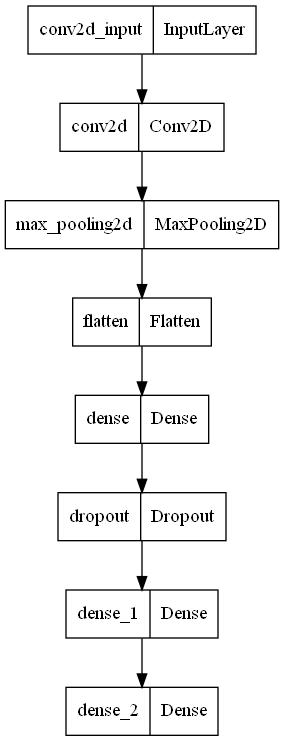

In [21]:
# To view the Neural Network
# pip install pydot
# pip install pydotplus
# pip install graphviz
tf.keras.utils.plot_model(model)

In [22]:
# Compiling our model
# sparse_categorical_crossentropy brcause y in form of labels of 10 defferent items
# if probabilities of class variable we would have used categorical_crossentropy
# if we had binary labels then we would have used binary_crossentropy
# sgd - stochastic gradient descent (telling tf to perorm backporpogatrion)
# Classification -> accuracy - the metric which will evaluate our model
# Regression -> mse metric
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [23]:
from tensorflow.keras.callbacks import EarlyStopping
# As we are monitoring accuracy, we would want to maximize it so mode = max
early_stop = EarlyStopping(patience=15,restore_best_weights=True)

In [25]:
model.fit(x_train,y_train,epochs=100,batch_size=64,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/100
938/938 [==============================] - 16s 17ms/step - loss: 0.9924 - accuracy: 0.6502 - val_loss: 0.6479 - val_accuracy: 0.7439
Epoch 2/100
938/938 [==============================] - 16s 17ms/step - loss: 0.5992 - accuracy: 0.7815 - val_loss: 0.5377 - val_accuracy: 0.7982
Epoch 3/100
938/938 [==============================] - 16s 17ms/step - loss: 0.5326 - accuracy: 0.8057 - val_loss: 0.4966 - val_accuracy: 0.8184
Epoch 4/100
938/938 [==============================] - 16s 17ms/step - loss: 0.4955 - accuracy: 0.8204 - val_loss: 0.4693 - val_accuracy: 0.8264
Epoch 5/100
938/938 [==============================] - 15s 17ms/step - loss: 0.4707 - accuracy: 0.8302 - val_loss: 0.4880 - val_accuracy: 0.8065
Epoch 6/100
938/938 [==============================] - 16s 17ms/step - loss: 0.4509 - accuracy: 0.8364 - val_loss: 0.4261 - val_accuracy: 0.8472
Epoch 7/100
938/938 [==============================] - 16s 17ms/step - loss: 0.4332 - accuracy: 0.8445 - val_loss: 0.4536 - val_ac

938/938 [==============================] - 16s 17ms/step - loss: 0.1893 - accuracy: 0.9312 - val_loss: 0.2456 - val_accuracy: 0.9134
Epoch 58/100
938/938 [==============================] - 16s 17ms/step - loss: 0.1873 - accuracy: 0.9304 - val_loss: 0.2415 - val_accuracy: 0.9130
Epoch 59/100
938/938 [==============================] - 16s 17ms/step - loss: 0.1845 - accuracy: 0.9320 - val_loss: 0.2462 - val_accuracy: 0.9143
Epoch 60/100
938/938 [==============================] - 16s 17ms/step - loss: 0.1852 - accuracy: 0.9315 - val_loss: 0.2457 - val_accuracy: 0.9120
Epoch 61/100
938/938 [==============================] - 16s 17ms/step - loss: 0.1799 - accuracy: 0.9343 - val_loss: 0.2558 - val_accuracy: 0.9101
Epoch 62/100
938/938 [==============================] - 16s 17ms/step - loss: 0.1773 - accuracy: 0.9340 - val_loss: 0.2412 - val_accuracy: 0.9136
Epoch 63/100
938/938 [==============================] - 16s 17ms/step - loss: 0.1774 - accuracy: 0.9348 - val_loss: 0.2391 - val_accuracy

In [26]:
model.history.history

{'loss': [0.9923971891403198,
  0.599210262298584,
  0.5326110124588013,
  0.49552634358406067,
  0.47065091133117676,
  0.45090019702911377,
  0.4332244098186493,
  0.41896653175354004,
  0.40589386224746704,
  0.39587754011154175,
  0.38545355200767517,
  0.3754027485847473,
  0.36700013279914856,
  0.358447402715683,
  0.34948188066482544,
  0.3435839116573334,
  0.33442360162734985,
  0.32991746068000793,
  0.32322394847869873,
  0.3175079822540283,
  0.31137815117836,
  0.30465367436408997,
  0.2993711829185486,
  0.29634833335876465,
  0.2919161915779114,
  0.28580009937286377,
  0.2818952202796936,
  0.27669310569763184,
  0.2734329402446747,
  0.2702980935573578,
  0.2650671899318695,
  0.2623676657676697,
  0.26030346751213074,
  0.2558673024177551,
  0.25199586153030396,
  0.24868841469287872,
  0.2451796978712082,
  0.2428051382303238,
  0.23795804381370544,
  0.23653563857078552,
  0.23257815837860107,
  0.23051336407661438,
  0.22735734283924103,
  0.22425279021263123,
  0

(0.0, 1.0)

<Figure size 864x576 with 0 Axes>

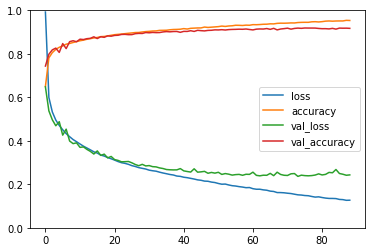

In [27]:
plt.figure(figsize=(12,8))
pd.DataFrame(model.history.history).plot()
plt.ylim(0,1)

In [28]:
# We can se val_accuracy still going up and val_loss still going down
# So the model has not converged yet, so should run for more epochs with earlystopping

In [29]:
# Evaluating our Model
ev = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2364 - accuracy: 0.9184


In [30]:
# Accuracy of 88.4% with ANN

In [32]:
ev

[0.23636586964130402, 0.91839998960495]

In [44]:
X_new = x_test[:3]

In [45]:
# To predict the class
y_pred=np.argmax(model.predict(X_new), axis=1)
y_pred

array([9, 2, 1], dtype=int64)

In [46]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


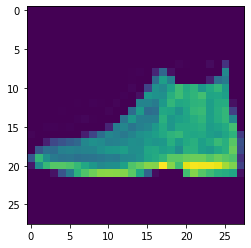

In [39]:
print(plt.imshow(X_new[0]))

AxesImage(54,36;334.8x217.44)


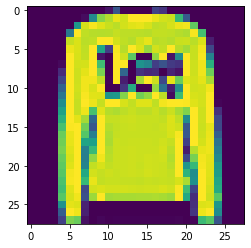

In [40]:
print(plt.imshow(X_new[1]))

AxesImage(54,36;334.8x217.44)


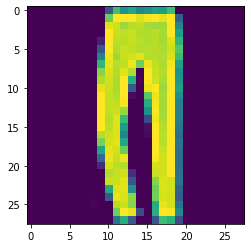

In [41]:
print(plt.imshow(X_new[2]))

## Thankyou